## Homework 3
* Generate dataset using make_classification function in the sklearn.datasets class. Generate 10000 samples with 8 features (X) with one label (y). Also, use following parameters
    * n_informative = 5
    * class_sep = 2
    * random_state = 42
* Explore and analyse raw data.
* Do preprocessing for classification.
* Split your dataset into train and test test (0.7 for train and 0.3 for test).
* Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)
* Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

In [ ]:
# Import necessary libraries

In [111]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from scipy.stats import iqr

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
# Generate dataset using make_classification function in the sklearn. 
# Convert it into pandas dataframe.

In [72]:
X, y = make_classification(n_samples = 10000, random_state = 42, n_informative = 5, class_sep = 2, n_features = 8)
X.shape, y.shape

((10000, 8), (10000,))

In [73]:
#df = pd.DataFrame(np.c_[X, y])
df = pd.DataFrame(X)
df.shape

(10000, 8)

In [74]:
df.head(10)

,0,1,2,3,4,5,6,7
0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344
1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611
2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524
3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934
4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770
5,-0.026304,-0.712668,1.290984,4.057603,2.568067,-2.968459,-2.841362,2.316500
6,-3.093468,1.817493,-0.446330,0.796296,1.325535,-2.172619,1.540533,0.839152
7,-2.007850,1.504093,-2.849461,3.565156,5.949817,-2.518652,2.521525,3.009275
8,3.355822,4.064974,-0.850354,-3.229093,1.814034,0.116749,3.920806,-0.584791
9,-3.249677,2.423485,-0.745789,0.378221,2.122584,-2.170585,2.260092,0.174337


In [75]:
# Check duplicate values and missing data.

In [76]:
#there are no duplicated values
df.duplicated().sum()

0

In [77]:
#there are no null values
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [17]:
# Visualize data for each feature (pairplot,distplot).

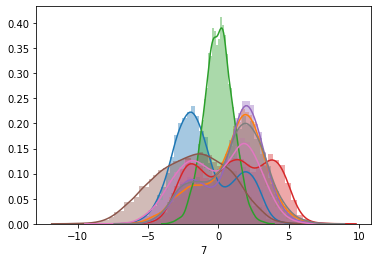

In [78]:
def create_plot(x):
    sns.distplot(df[x])

for i in range(0,8):
    create_plot(i)

In [79]:
# Draw correlation matrix.

In [80]:
df.corr()

,0,1,2,3,4,5,6,7
0,1.000000,0.235306,0.019813,-0.705908,0.310024,0.635628,0.545522,-0.636540
1,0.235306,1.000000,-0.001988,-0.618075,-0.180396,-0.347091,0.469165,-0.129568
2,0.019813,-0.001988,1.000000,-0.010795,0.027022,0.023192,0.020194,-0.018107
3,-0.705908,-0.618075,-0.010795,1.000000,0.086099,-0.439463,-0.672497,0.758458
4,0.310024,-0.180396,0.027022,0.086099,1.000000,0.461343,0.465025,-0.176576
5,0.635628,-0.347091,0.023192,-0.439463,0.461343,1.000000,0.547131,-0.647011
6,0.545522,0.469165,0.020194,-0.672497,0.465025,0.547131,1.000000,-0.388518
7,-0.636540,-0.129568,-0.018107,0.758458,-0.176576,-0.647011,-0.388518,1.000000


In [81]:
# Handle outliers (you can use IsolationForest, Z-score, IQR)

In [82]:
df.describe()

,0,1,2,3,4,5,6,7
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-1.004918,0.982548,0.003020,1.071892,0.995967,-1.869138,-0.001747,0.994744
std,2.125161,2.236374,1.016612,2.571314,2.161592,2.587044,2.446634,2.266276
min,-7.361942,-6.334871,-3.531879,-6.507147,-6.124101,-10.552410,-8.263252,-6.274545
25%,-2.575438,-0.418504,-0.673464,-1.196634,-0.507065,-3.750591,-1.984409,-0.594088
50%,-1.448219,1.414705,0.013764,1.182811,1.478394,-1.769049,0.215688,1.373192
75%,0.666344,2.548942,0.680873,3.296581,2.529939,0.072616,1.985890,2.617999
max,6.445003,7.784181,3.443926,8.484377,7.824402,5.853682,6.944183,7.815690


In [83]:
iqr(df)

3.6162649776206903

In [84]:
z = np.abs(stats.zscore(df))
z

array([[0.24934109, 0.21155632, 1.54848575, ..., 0.53763097, 0.00566284,
        1.15220659],
       [1.21562472, 1.62265494, 0.52187207, ..., 0.03314851, 1.40338979,
        0.51777165],
       [0.78712613, 0.16242045, 0.25947611, ..., 0.12249416, 0.48387509,
        0.35998293],
       ...,
       [0.67334555, 1.4827283 , 0.52439513, ..., 0.50960652, 0.53475377,
        0.55105502],
       [0.08336999, 0.15830524, 0.83152777, ..., 1.11728642, 0.99626339,
        0.9651887 ],
       [0.66636667, 0.73903683, 0.68826729, ..., 1.01941697, 1.24352619,
        1.01322073]])

In [85]:
outliers = list(set(np.where(z > 3)[0]))
len(outliers)

58

In [112]:
to_model_columns = df.columns[0:8]

from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), 
                    max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

clf.fit(df[to_model_columns])
pred = clf.predict(df[to_model_columns])
df['anomaly']=pred
outliers=df.loc[df['anomaly']==-1]
outlier_index=list(outliers.index)

#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(df['anomaly'].value_counts())

 1    8800
-1    1200
Name: anomaly, dtype: int64


In [87]:
# Split dataset into train and test set

In [88]:
X.shape

(10000, 8)

In [89]:
y.shape

(10000,)

In [135]:
# Locate features and label
X, y = df.iloc[: , :-1], df.iloc[: , -1]

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [137]:
X_train

,0,1,2,3,4,5,6,7
9254,-1.988394,1.610143,-0.223653,1.785514,-2.382934,-4.726259,-2.394578,3.050377
1561,-1.605191,1.853359,-0.271610,1.106163,-2.489851,-4.180478,-1.715804,2.797902
1670,-1.813249,-1.079741,-1.149430,5.386079,1.673374,-4.371704,-4.026307,3.445497
6087,-3.058550,2.640837,-1.728905,2.706070,-1.775603,-7.018835,-3.274851,3.344528
6669,-3.680925,1.601632,2.474623,2.999703,-3.231377,-7.063301,-4.894835,2.998605
...,...,...,...,...,...,...,...,...
5734,-3.775491,4.128033,0.096262,-2.151836,-0.771601,-2.568588,2.784466,-0.893880
5191,-1.562775,3.987294,0.584253,-0.424515,-0.013253,-3.195606,2.694082,2.577694
5390,2.100454,2.184480,0.263973,-2.631713,-0.051688,-0.127744,0.590893,-2.193862
860,2.426819,0.675555,0.398819,-1.518354,1.566493,2.025135,2.605119,-0.382470


In [138]:
y_train

9254    1
1561    1
1670    1
6087    1
6669   -1
       ..
5734   -1
5191    1
5390    1
860     1
7270   -1
Name: anomaly, Length: 8000, dtype: int32

In [139]:
# Import Decision Tree, define different hyperparamters and tune the algorithm.

In [140]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.916
Accuracy of test: 0.907


* Bias for training: 1 - 0.916 = 0.084 
* Bias for test: 1 - 0.907 = 0.093
* Variance = test bias - training bias = 0.009

In [134]:
from scipy.stats import randint
param_dist = {"max_depth": [4, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

#Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

#Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

#Fit it to the data
tree_cv.fit(X,y)

#Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 8}
Best score is 0.979


In [142]:
X.columns

Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='object')

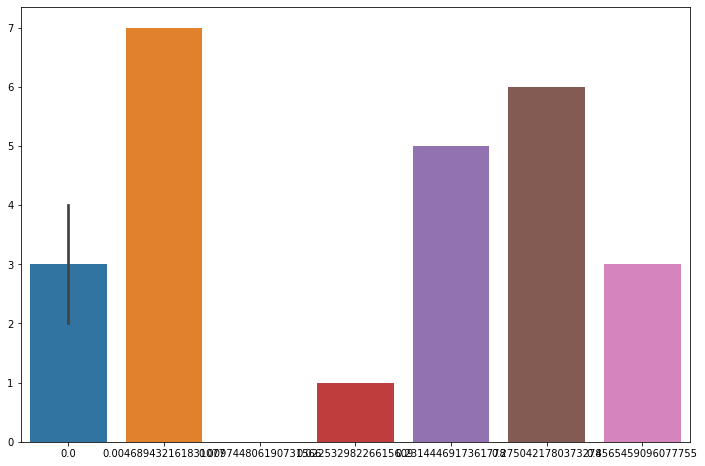

In [144]:
#Feature Importance
plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [145]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.

In [146]:
#Classification Report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          -1       0.73      0.37      0.49       242
           1       0.92      0.98      0.95      1758

    accuracy                           0.91      2000
   macro avg       0.82      0.68      0.72      2000
weighted avg       0.90      0.91      0.89      2000



In [147]:
#Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.8223914987275603
Recall = 0.6762803335871905
Accuracy = 0.907
F1 Score = 0.7203100047817966


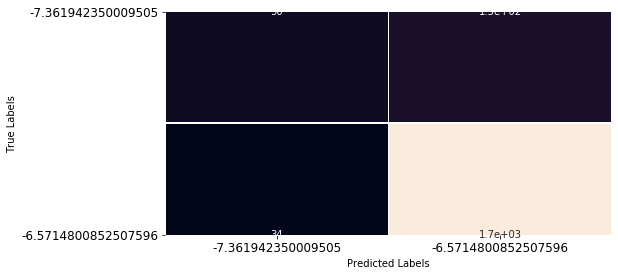

In [164]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, linewidths=.5)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 10)
ax.set_ylabel('True Labels',fontsize = 10)
plt.show()

In [149]:
# Import XGBoostClassifier, define different hyperparamters and tune the algorithm.

In [171]:
import xgboost as xgb

In [173]:
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

categories

preds = model.predict(dmatrix_test)
preds[:10]

best_preds = np.asarray([np.argmax(line) for line in preds])

best_preds

In [157]:
# Visualize feature importances.

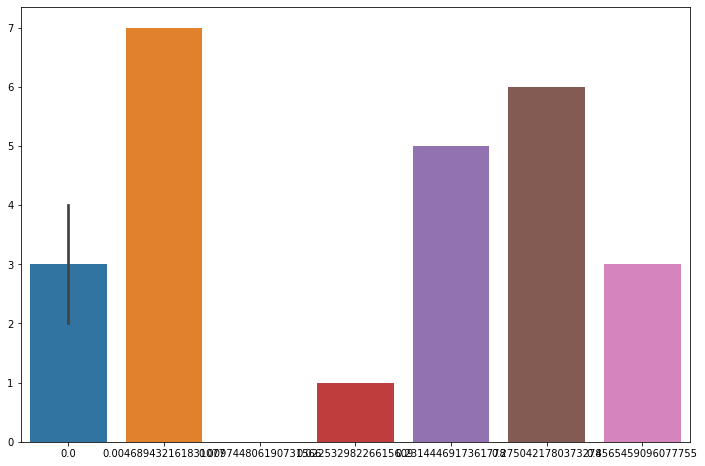

In [158]:
#Feature Importance
plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [159]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, best_preds)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [162]:
# Evaluate your result and select best performing algorithm for our case.